## Andrea Bortoluzzi

## University of Trento 

## Computational Social Science 

# Sentiment analysis on twitter’s american users during the 2020 USA presidential election

In [1]:
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px  
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob 
from wordcloud import WordCloud 

## Data loading

https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets

In [2]:
trump = pd.read_csv("hashtag_donaldtrump.csv", lineterminator= '\n')
trump = trump[['created_at','tweet', 'likes', 'city', 'country', 'state']]
trump['country'] = trump['country'].replace({'United States of America': "US",'United States': "US"})

In [3]:
print(trump.shape)
trump.isna().sum()

(970919, 6)


created_at         0
tweet              0
likes              0
city          743732
country       528171
state         650299
dtype: int64

In [4]:
trump.dropna(inplace=True)
trump.shape

(213309, 6)

In [5]:
trump.head()


,created_at,tweet,likes,city,country,state
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,Portland,US,Oregon
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,Washington,US,District of Columbia
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,San Diego,US,California
13,2020-10-15 00:00:31,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,City of Edinburgh,United Kingdom,Scotland


In [6]:
random.seed(123)
biden = pd.read_csv("hashtag_joebiden.csv", lineterminator= '\n')
biden = biden[['created_at','tweet', 'likes', 'city', 'country', 'state']]
biden['country'] = biden['country'].replace({'United States of America': "US",'United States': "US"})
biden.dropna(inplace=True)
biden.shape

(175797, 6)

In [7]:
biden.head()

,created_at,tweet,likes,city,country,state
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,Tampa,US,Florida
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,Los Angeles,US,California
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,Los Angeles,US,California
28,2020-10-15 00:02:05,#Trump #Obama #Clinton #Biden\n\n#ManWomanPers...,0.0,London,United Kingdom,England


## Exploratory Data Analysis (EDA)

In [8]:

# creating a new column 'candidate' todifferentiate 
# between tweets of Trump and Biden upon concatination 
trump['candidate'] = 'trump'

# biden dataframe 
biden['candidate'] = 'biden'

# combining the dataframes 
data = pd.concat([trump, biden]) 

# FInal data shape 
print('Final Data Shape :', data.shape) 

# View the first 2 rows 
print("\nFirst 2 rows:") 
data.head() 
print(data.shape)


Final Data Shape : (389106, 7)

First 2 rows:
(389106, 7)


In [9]:
data['country'].value_counts()

country
US                192609
United Kingdom     33930
India              21771
France             20850
Germany            19876
                   ...  
Somalia                2
Cameroon               1
Paraguay               1
Bahrain                1
Vietnam                1
Name: count, Length: 102, dtype: int64

In [10]:
# Group the data by 'candidate' and count the 
# number of tweets for each candidate 
tweets_count = data.groupby('candidate')['tweet'].count().reset_index() 

# Interactive bar chart 
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate', 
color_discrete_map={'Trump': 'pink', 'Biden': 'blue'}, 
labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'}, 
title='Tweets for Candidates',
width=800,   # Larghezza del grafico
height=600) 

# Update the layout with a black theme 
fig.update_layout(plot_bgcolor='black', 
paper_bgcolor='black', font_color='white')
# Show the chart 
fig.show() 

In [11]:
tweets_count

,candidate,tweet
0,biden,175797
1,trump,213309


In [11]:
# Interactive bar chart 
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index() 
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate', 
color_discrete_map={'Trump': 'blue', 'Biden': 'green'}, 
labels={'candidate': 'Candidate', 'likes': 'Total Likes'}, 
title='Comparison of Likes') 

# Update the layout with a black theme 
fig.update_layout(plot_bgcolor='black', 
paper_bgcolor='black', font_color='white',
width=800,   # Larghezza del grafico
height=600) 

# Show the chart 
fig.show() 

In [12]:


# Top10 Countrywise tweets Counts 
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).reset_index().head(10) 
# top10countries 

# Interactive bar chart 
fig = px.bar(top10countries, x='country', y='tweet', 
template='plotly_white', 
color_discrete_sequence=px.colors.qualitative.Dark24_r, 
title='Top10 Countrywise tweets Counts',
width=800,   # Larghezza del grafico
height=600)
# To view the graph 
fig.show() 



In [13]:
# the number of tweets done for each 
# candidate by all the countries. 
tweet_df = data.groupby(['country', 'candidate'])['tweet'].count().reset_index() 

# Candidate for top 10 country tweet 
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)] 
print(tweeters)
# Plot for tweet counts for each candidate 
# in the top 10 countries 
fig = px.bar(tweeters, x='country', y='tweet', color='candidate', 
labels={'country': 'Country', 'tweet': 'Number of Tweets', 
        'candidate': 'Candidate'}, 
title='Tweet Counts for Each Candidate in the Top 10 Countries', 
template='plotly_dark', 
barmode='group',
width=800,   # Larghezza del grafico
height=600) 

# Show the chart 
fig.show() 

             country candidate   tweet
6          Australia     biden    3368
7          Australia     trump    5415
28            Canada     biden    6704
29            Canada     trump   10809
59            France     biden    8930
60            France     trump   11920
61           Germany     biden    7505
62           Germany     trump   12371
73             India     biden   11739
74             India     trump   10032
85             Italy     biden    2373
86             Italy     trump    3151
172  The Netherlands     biden    3685
173  The Netherlands     trump    5098
178           Turkey     biden    2659
179           Turkey     trump    3243
180               US     biden   90642
181               US     trump  101967
188   United Kingdom     biden   13899
189   United Kingdom     trump   20031


/tmp/ipykernel_5771/4153498936.py:51: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




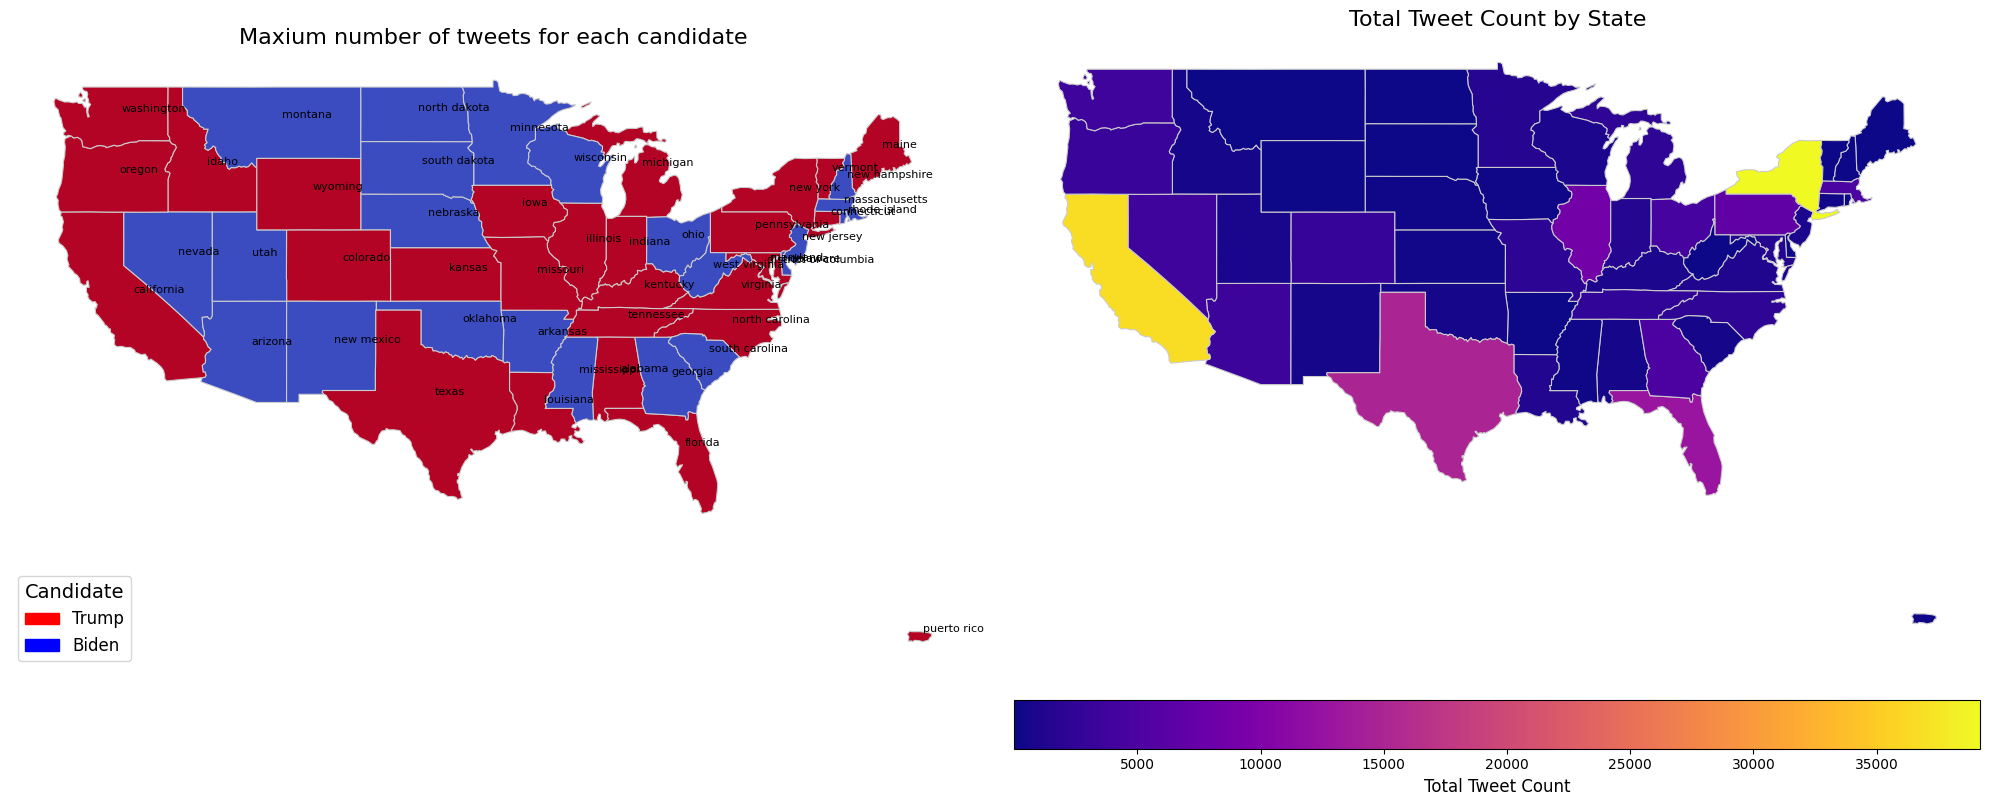

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch



# Filtra i dati per includere solo le righe dove il paese è "USA"
us_data = data[data['country'] == 'US']

# Aggrega i dati per stato e candidato per ottenere il candidato prevalente in ogni stato
state_votes = us_data.groupby(['state', 'candidate']).size().reset_index(name='tweet_count')
state_votes_winner = state_votes.loc[state_votes.groupby('state')['tweet_count'].idxmax()]

# Aggrega i dati per stato per ottenere il conteggio totale dei tweet per ogni stato
state_tweet_counts = us_data.groupby(['state']).size().reset_index(name='total_tweet_count')

# Carica la mappa degli Stati Uniti
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Assicurati che i nomi degli stati siano in minuscolo per il merge
us_states['name'] = us_states['name'].str.lower()
state_votes_winner['state'] = state_votes_winner['state'].str.lower()
state_tweet_counts['state'] = state_tweet_counts['state'].str.lower()

# Escludi Alaska e Hawaii per una migliore visualizzazione
us_states = us_states[~us_states['name'].isin(['alaska', 'hawaii'])]
state_votes_winner = state_votes_winner[~state_votes_winner['state'].isin(['alaska', 'hawaii'])]
state_tweet_counts = state_tweet_counts[~state_tweet_counts['state'].isin(['alaska', 'hawaii'])]

# Merge per la mappa dei voti
us_states_votes = us_states.merge(state_votes_winner, left_on='name', right_on='state', how='left')

# Merge per la mappa dei tweet
us_states_tweets = us_states.merge(state_tweet_counts, left_on='name', right_on='state', how='left')

# Creazione delle mappe
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Mappa dei voti per Trump e Biden
us_states_votes.plot(column='candidate', cmap='coolwarm', linewidth=0.8, ax=ax[0], edgecolor='0.8')
ax[0].set_title('Maxium number of tweets for each candidate', fontsize=16)
ax[0].set_axis_off()

# Aggiungi legenda personalizzata
handles = [Patch(color='red', label='Trump'), Patch(color='blue', label='Biden')]
ax[0].legend(handles=handles, title='Candidate', loc='lower left', fontsize=12, title_fontsize=14)

# Annotazioni per i nomi degli stati
for x, y, label in zip(us_states_votes.geometry.centroid.x, us_states_votes.geometry.centroid.y, us_states_votes['name']):
    ax[0].annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Mappa del conteggio dei tweet per stato
us_states_tweets.plot(column='total_tweet_count', cmap='plasma', linewidth=0.8, ax=ax[1], edgecolor='0.8')
ax[1].set_title('Total Tweet Count by State', fontsize=16)
ax[1].set_axis_off()

# Barra colore per il conteggio dei tweet
cbar = fig.colorbar(ax[1].collections[0], ax=ax[1], orientation='horizontal', pad=0.05)
cbar.set_label('Total Tweet Count', fontsize=12)

plt.tight_layout()
plt.show()



## Data preprocessing 

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
custom_stopwords = stopwords.words('english') + ['biden', 'trump','donaldtrump', 'joebiden', 'election','president', 'amp', 'realdonaldtrump', 'america', 'get', 'like', 'bidenharris',
                                                 'kamalaharris','american', 'one', 'maga', 'en', 'que', 'gop', 'know', 'say', 'la', 'de', 'joe', 'donald', 'debate',
                                                  'new', 'time', 'day', 'great', 'first', 'news', 'podcast', 'covid', 'lol', 'world', 'best', 'great', 'even', 'case', 'new',
                                                   'el', 'los', 'por', 'para', 'con', 'eeuu', 'twitter', 'go', 'many', 'much', 'people' , 'vote', 'going']
# Define the cleaning function
def clean(text): 
    # Remove URLs 
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text)) 

    # Convert text to lowercase 
    text = text.lower() 

    # Replace anything other than alphabets a-z with a space 
    text = re.sub('[^a-z]', ' ', text) 

    # Split the text into single words 
    text = text.split() 

    # Initialize WordNetLemmatizer 
    lm = WordNetLemmatizer() 

    # Lemmatize words and remove stopwords 
    text = [lm.lemmatize(word) for word in text if word not in set(custom_stopwords)] 

    # Join the words back into a sentence 
    text = ' '.join(word for word in text) 

    return text

# Define tokenization function
def tokenize(text):
    return nltk.word_tokenize(text)


# Define analysis function using TextBlob polarity
def getAnalysis(score): 
    if score < 0: 
        return 'negative'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'positive'

# Define VADER sentiment analysis function
def vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/andrea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/andrea/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
trump_tweets = data[data['candidate'] == 'trump'] 

trump_tweets = trump_tweets.loc[trump_tweets.country == 'US'] 

trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)

trump_tweets['tokens'] = trump_tweets['cleantext'].apply(tokenize)

trump_tweets['vader_sentiment'] = trump_tweets['cleantext'].apply(vader_sentiment)

trump_tweets['analysis'] = trump_tweets['vader_sentiment'].apply(getAnalysis)

trump_tweets.head()

,created_at,tweet,likes,city,country,state,candidate,cleantext,tokens,vader_sentiment,analysis
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,Portland,US,Oregon,trump,student used hear year ten year heard china as...,"[student, used, hear, year, ten, year, heard, ...",0.0000,neutral
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,Washington,US,District of Columbia,trump,tie tie rally iowa,"[tie, tie, rally, iowa]",0.0000,neutral
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois,trump,nypost censorship censored manipulate u favor ...,"[nypost, censorship, censored, manipulate, u, ...",-0.1027,negative
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,San Diego,US,California,trump,presidenttrump landslidevictory kag moreyears ...,"[presidenttrump, landslidevictory, kag, moreye...",0.5267,positive
22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,Portland,US,Oregon,trump,nobody like tell farmer better way working ass...,"[nobody, like, tell, farmer, better, way, work...",0.2263,positive


## Results of sentiment analysis using Valence Aware Dictionary and Sentiment Reasoner (VADER)

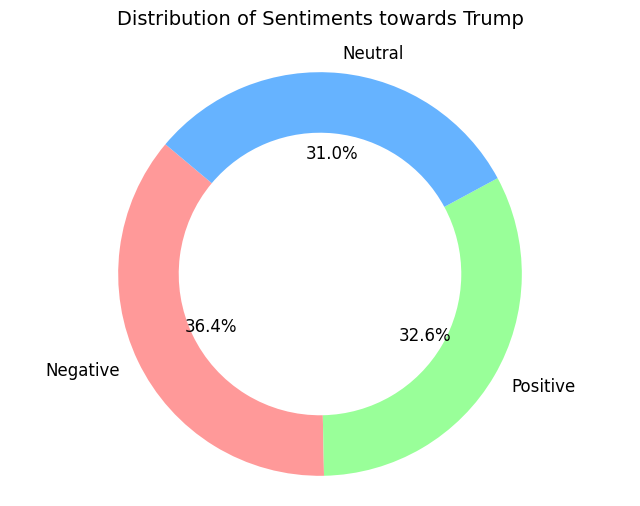

In [17]:
import matplotlib.pyplot as plt

# Dati dei sentimenti (questi sono solo esempi, sostituisci con i tuoi dati reali)
sentiments = trump_tweets.analysis.value_counts(normalize=True) * 100

# Imposta figure e dimensioni
plt.figure(figsize=(8, 6))

# Imposta le etichette e i colori
labels = ['Negative', 'Positive', 'Neutral']
colors = ['#ff9999','#99ff99','#66b3ff']

# Crea il grafico a torta
wedges, texts, autotexts = plt.pie(sentiments, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Imposta il titolo e l'aspetto del grafico
plt.title('Distribution of Sentiments towards Trump', fontsize=14, pad=20)  # Aggiunge spazio extra sotto il titolo
plt.axis('equal')  # Assicura che il grafico a torta sia un cerchio

# Aggiungi personalizzazioni estetiche
for text in texts + autotexts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('black')

# Impostazioni per il tema con sfondo bianco
plt.style.use('default')  

plt.subplots_adjust(top=0.85)  

# Visualizza il grafico
plt.show()


In [20]:
biden_tweets = data[data['candidate'] == 'biden'] 

biden_tweets = biden_tweets.loc[biden_tweets.country == 'US'] 

biden_tweets['cleantext'] = biden_tweets['tweet'].apply(clean)

biden_tweets['tokens'] = biden_tweets['cleantext'].apply(tokenize)

biden_tweets['vader_sentiment'] = biden_tweets['cleantext'].apply(vader_sentiment)

biden_tweets['analysis'] = biden_tweets['vader_sentiment'].apply(getAnalysis)

biden_tweets.head()

,created_at,tweet,likes,city,country,state,candidate,cleantext,tokens,vader_sentiment,analysis
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois,biden,nypost censorship censored manipulate u favor ...,"[nypost, censorship, censored, manipulate, u, ...",-0.1027,negative
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,Tampa,US,Florida,biden,comment democrat understand ruthless china chi...,"[comment, democrat, understand, ruthless, chin...",0.0000,neutral
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,1.0,Los Angeles,US,California,biden,everything help democrat win making sure nobod...,"[everything, help, democrat, win, making, sure...",0.1027,positive
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,Los Angeles,US,California,biden,realjameswoods bidencrimefamily hunterbiden hu...,"[realjameswoods, bidencrimefamily, hunterbiden...",0.0000,neutral
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,New York,US,New York,biden,come abc please right thing move town hall bet...,"[come, abc, please, right, thing, move, town, ...",0.5574,positive


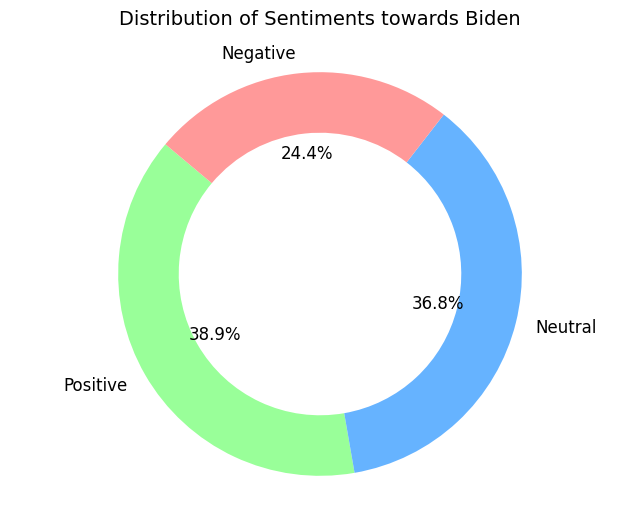

In [21]:
import matplotlib.pyplot as plt

# Dati dei sentimenti per Biden (questi sono solo esempi, sostituisci con i tuoi dati reali)
biden_sentiments = biden_tweets.analysis.value_counts(normalize=True) * 100

# Imposta figure e dimensioni
plt.figure(figsize=(8, 6))

# Imposta le etichette e i colori
labels = ['Positive', 'Neutral', 'Negative']
colors = ['#99ff99','#66b3ff','#ff9999']

# Crea il grafico a torta
wedges, texts, autotexts = plt.pie(biden_sentiments, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Imposta il titolo e l'aspetto del grafico
plt.title('Distribution of Sentiments towards Biden', fontsize=14, pad=20)  # Aggiunge spazio extra sotto il titolo
plt.axis('equal')  # Assicura che il grafico a torta sia un cerchio

# Aggiungi personalizzazioni estetiche
for text in texts + autotexts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('black')

plt.style.use('default')  

plt.subplots_adjust(top=0.85)  

# Visualizza il grafico
plt.show()


In [22]:
trump_tweets.analysis.value_counts(normalize=True)*100

analysis
negative    36.427472
positive    32.559554
neutral     31.012975
Name: proportion, dtype: float64

In [23]:
biden_tweets.analysis.value_counts(normalize=True)*100

analysis
positive    38.850643
neutral     36.753381
negative    24.395975
Name: proportion, dtype: float64

In [24]:
tweets = pd.concat([trump_tweets, biden_tweets])

tweets.sort_values(by='created_at', inplace=True)
tweets.reset_index(drop=True, inplace=True)
tweets


,created_at,tweet,likes,city,country,state,candidate,cleantext,tokens,vader_sentiment,analysis
0,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,Portland,US,Oregon,trump,student used hear year ten year heard china as...,"[student, used, hear, year, ten, year, heard, ...",0.0000,neutral
1,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,Washington,US,District of Columbia,trump,tie tie rally iowa,"[tie, tie, rally, iowa]",0.0000,neutral
2,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois,biden,nypost censorship censored manipulate u favor ...,"[nypost, censorship, censored, manipulate, u, ...",-0.1027,negative
3,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,Chicago,US,Illinois,trump,nypost censorship censored manipulate u favor ...,"[nypost, censorship, censored, manipulate, u, ...",-0.1027,negative
4,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,San Diego,US,California,trump,presidenttrump landslidevictory kag moreyears ...,"[presidenttrump, landslidevictory, kag, moreye...",0.5267,positive
...,...,...,...,...,...,...,...,...,...,...,...
192604,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,Washington,US,District of Columbia,biden,flotus excited flotus whose vagina seen,"[flotus, excited, flotus, whose, vagina, seen]",0.3400,positive
192605,2020-11-08 23:58:38,"@Jim_Jordan FCK NO , Democrats and the #msm la...",1.0,New York,US,New York,trump,jim jordan fck democrat msm launched hr attack...,"[jim, jordan, fck, democrat, msm, launched, hr...",-0.6842,negative
192606,2020-11-08 23:58:44,Cómo pasó el abogado de Trump de un hotel a un...,0.0,New York,US,New York,trump,c mo pa abogado un hotel un aparcamiento junto...,"[c, mo, pa, abogado, un, hotel, un, aparcamien...",0.0000,neutral
192607,2020-11-08 23:58:51,Have you know decency #Trump @GOP? Do you kno...,3.0,New York,US,New York,trump,decency child die billheath account longer exi...,"[decency, child, die, billheath, account, long...",-0.9477,negative


## Latent Dirichlet allocation (LDA)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def lda_topic_modeling(data, n_topics=1, n_top_words=40):
    count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=custom_stopwords)
    count_data = count_vectorizer.fit_transform(data['cleantext'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(count_data)
    words = count_vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topics.append([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return lda, topics

# Run LDA for Trump and Biden tweets separately
lda_trump_positive, topics_trump_positive = lda_topic_modeling(trump_tweets[trump_tweets['analysis'] == 'positive'])
lda_trump_negative, topics_trump_negative = lda_topic_modeling(trump_tweets[trump_tweets['analysis'] == 'negative'])
lda_trump_neutral, topics_trump_neutral = lda_topic_modeling(trump_tweets[trump_tweets['analysis'] == 'neutral'])

lda_biden_positive, topics_biden_positive = lda_topic_modeling(biden_tweets[biden_tweets['analysis'] == 'positive'])
lda_biden_negative, topics_biden_negative = lda_topic_modeling(biden_tweets[biden_tweets['analysis'] == 'negative'])
lda_biden_neutral, topics_biden_neutral = lda_topic_modeling(biden_tweets[biden_tweets['analysis'] == 'neutral'])

# Print topics
print("Trump Positive Tweet Topics:", topics_trump_positive)
print("Trump Negative Tweet Topics:", topics_trump_negative)
print("Trump Neutral Tweet Topics:", topics_trump_neutral)

print("Biden Positive Tweet Topics:", topics_biden_positive)
print("Biden Negative Tweet Topics:", topics_biden_negative)
print("Biden Neutral Tweet Topics:", topics_biden_neutral)


Trump Positive Tweet Topics: [['win', 'would', 'supporter', 'want', 'republican', 'good', 'state', 'love', 'think', 'year', 'need', 'support', 'make', 'country', 'care', 'right', 'democrat', 'please', 'voted', 'potus', 'well', 'see', 'let', 'usa', 'still', 'electionday', 'said', 'better', 'help', 'voter', 'voting', 'rally', 'never', 'campaign', 'could', 'party', 'god', 'thing', 'take', 'way']]
Trump Negative Tweet Topics: [['would', 'fraud', 'year', 'republican', 'country', 'stop', 'think', 'want', 'state', 'need', 'right', 'death', 'make', 'supporter', 'voter', 'never', 'lie', 'potus', 'racist', 'democrat', 'campaign', 'let', 'take', 'still', 'said', 'way', 'hate', 'see', 'via', 'white', 'thing', 'coronavirus', 'voting', 'rally', 'ballot', 'could', 'man', 'million', 'look', 'back']]
Trump Neutral Tweet Topics: [['elecciones', 'electionday', 'dumptrump', 'voteblue', 'blm', 'via', 'usa', 'antitrump', 'please', 'potus', 'anti', 'operationmaga', 'murdererinchief', 'ftrumps', 'negligenthom

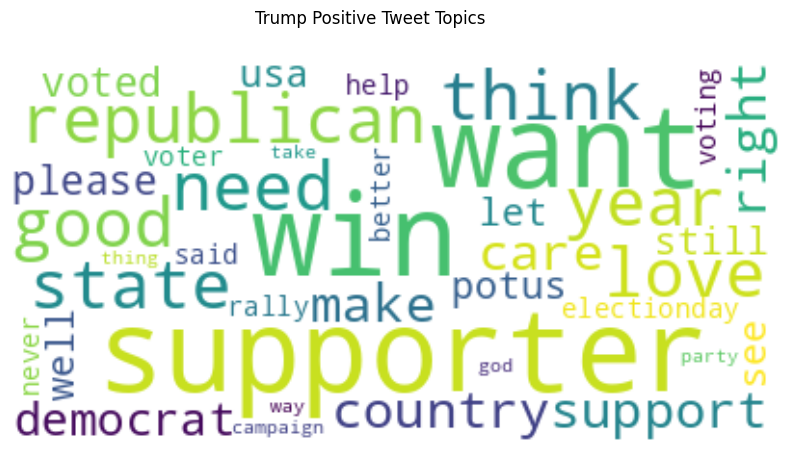

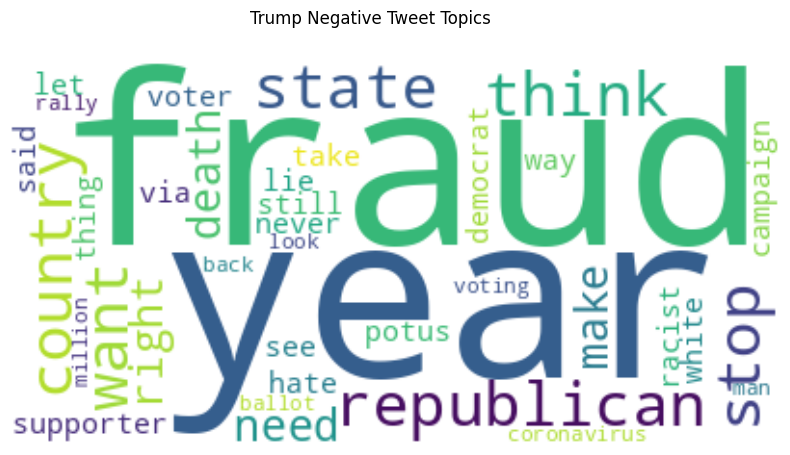

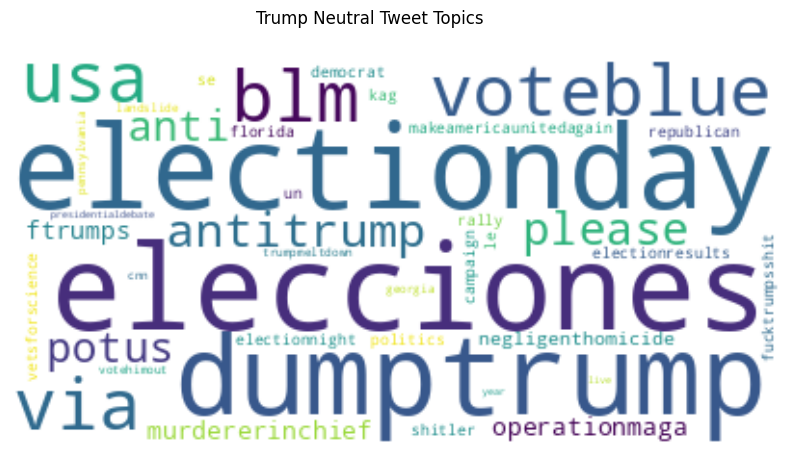

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_word_cloud(topics, title):
    num_topics = len(topics)
    fig, axs = plt.subplots(1, num_topics, figsize=(20, 5))
    
    if num_topics == 1:
        axs = [axs]  # Make axs iterable if there's only one subplot

    for i, topic in enumerate(topics):
        wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(' '.join(topic))
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].axis('off')
        
    plt.suptitle(title)
    plt.show()

# Visualize topics for Trump tweets
plot_word_cloud(topics_trump_positive, 'Trump Positive Tweet Topics')
plot_word_cloud(topics_trump_negative, 'Trump Negative Tweet Topics')
plot_word_cloud(topics_trump_neutral, 'Trump Neutral Tweet Topics')

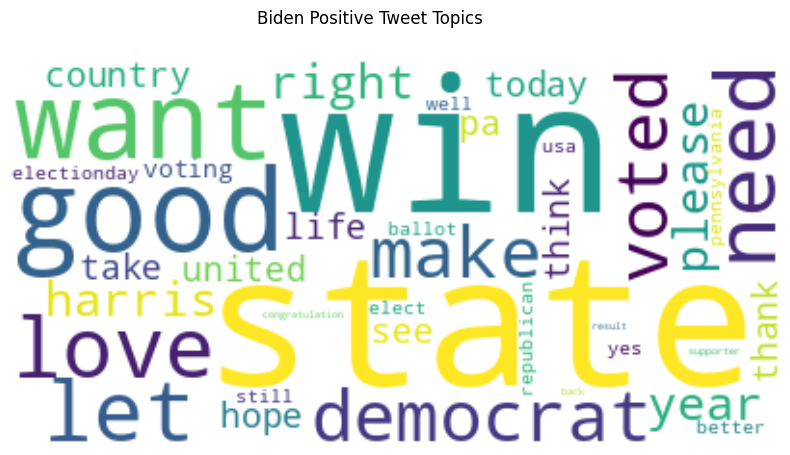

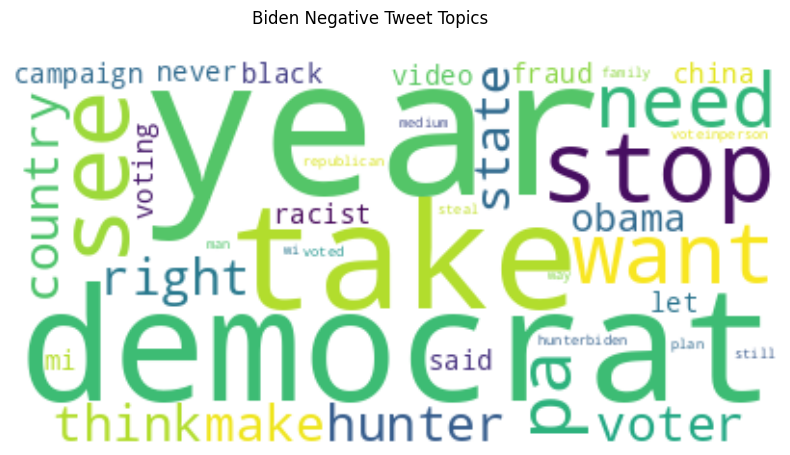

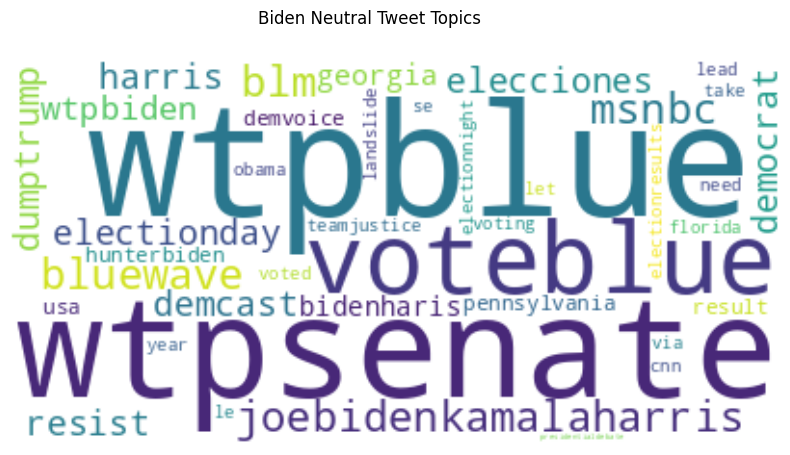

In [27]:
# Visualize topics for Biden tweets
plot_word_cloud(topics_biden_positive, 'Biden Positive Tweet Topics')
plot_word_cloud(topics_biden_negative, 'Biden Negative Tweet Topics')
plot_word_cloud(topics_biden_neutral, 'Biden Neutral Tweet Topics')